# Ads Click Through Rate: Case Study

Ads Click Through Rate measures the effectiveness of an advertising campaign by calculating the ratio of clicks to impressions. It provides insights into how engaging and relevant an ad is to the target audience.

The dataset provided contains information related to Ads CTR for a specific online advertising campaign. It consists of the following columns:

**Date**: The date on which the data was recorded.

**Clicks**: The number of times users clicked on the ads.

**Impressions**: The total number of times the ads were displayed to users.

# Analysis That We Need to do on Dataset

**Ads CTR Forecasting**

In [5]:
# Importing necessary Python Libraries & dataset

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_csv('ctr.csv')
print(data)

           Date  Clicks  Impressions
0    2022-10-19    2851        58598
1    2022-10-20    2707        57628
2    2022-10-21    2246        50135
3    2022-10-22    1686        40608
4    2022-10-23    1808        41999
..          ...     ...          ...
360  2023-10-14     885        28487
361  2023-10-15    1180        33440
362  2023-10-16    1624        41688
363  2023-10-17    1751        40957
364  2023-10-18    1573        40351

[365 rows x 3 columns]


In [8]:
# Converting Date Column in DataFrame from string format to datetime format

data['Date'] = pd.to_datetime(data['Date'])

# Setting Date is Index of DataFrame
data.set_index('Date', inplace=True)

**Visualize the Clicks & Impressions over Time**

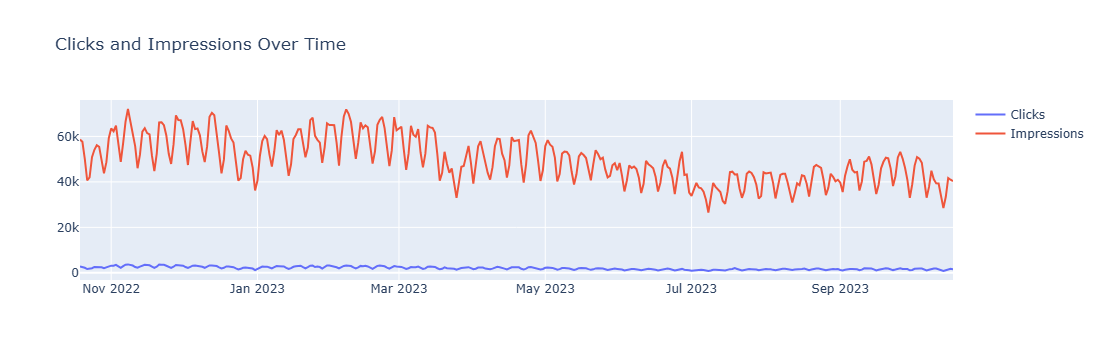

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Clicks'], mode='lines', name='Clicks'))
fig.add_trace(go.Scatter(x=data.index, y=data['Impressions'], mode='lines', name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')
fig.show()

**Relationships b/w Clicks & Impressions**

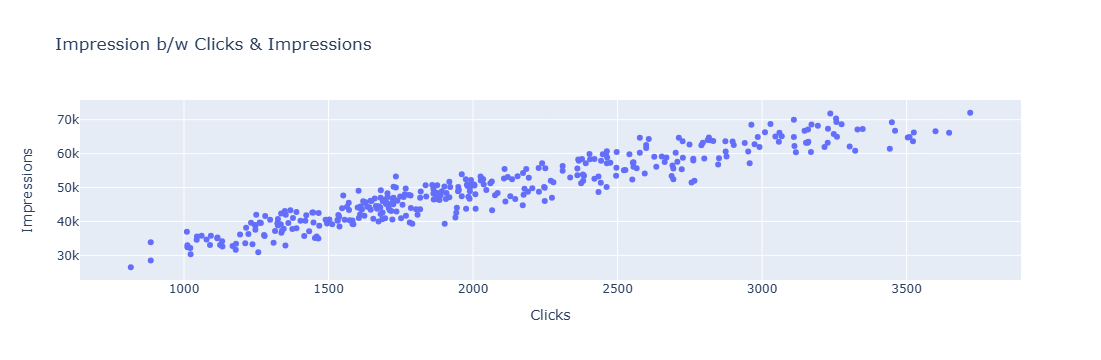

In [14]:
# Visualizing the Relationship b/w Clicks & Impressions using Scatter Plot
fig = px.scatter(data, x='Clicks', y='Impressions', title='Impression b/w Clicks & Impressions', 
                 labels = {'Clicks':'Clicks', 'Impressions':'Impressions'})
fig.update_layout(xaxis_title='Clicks', yaxis_title='Impressions')
fig.show()

The relationship between clicks and impressions is **linear**. It means **higher ad impressions result in higher ad clicks**. 

**Calculate & Visualize CTR (Click Through Rate) Over TIme**

C:\Users\LENOVO\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



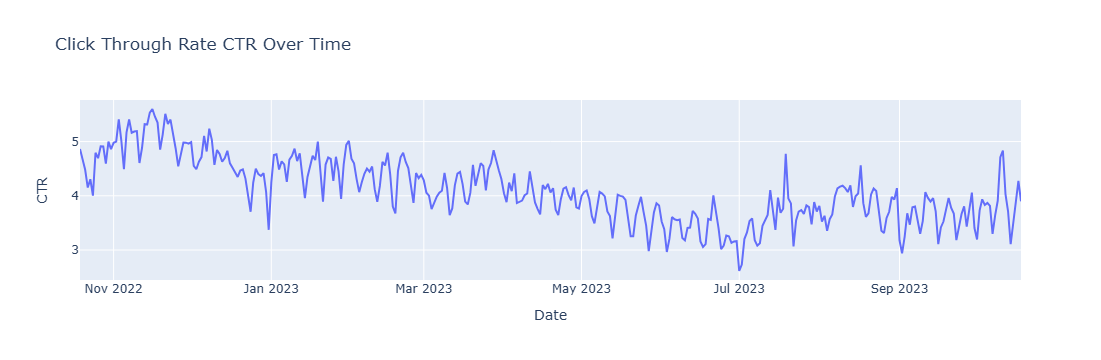

In [20]:
data['CTR'] = (data['Clicks'] / data['Impressions']) * 100

fig =px.line(data, x=data.index, y='CTR', title='Click Through Rate CTR Over Time')
fig.show()

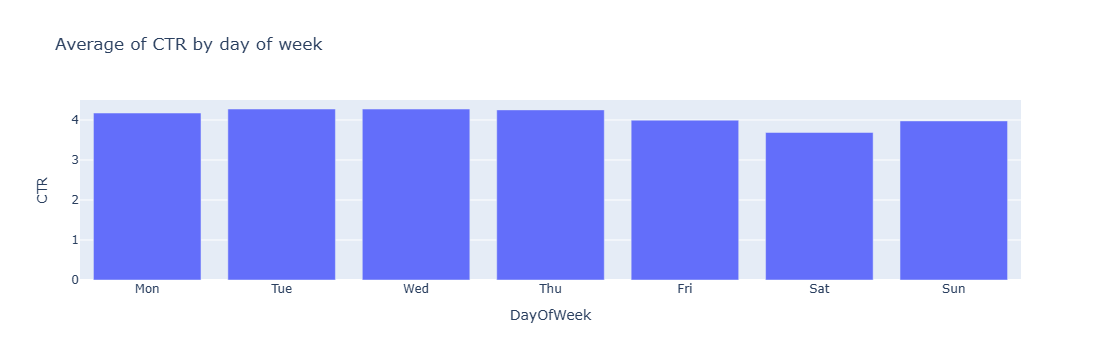

In [25]:
# Let's look at the Average CTR by day of the week

data['DayOfWeek'] = data.index.dayofweek

# EDA Based on the DayOfWeek
day_of_week_ctr = data.groupby('DayOfWeek')['CTR'].mean().reset_index()
day_of_week_ctr['DayOfWeek'] = ['Mon','Tue','Wed','Thu','Fri', 'Sat','Sun']

# Visualize
fig = px.bar(day_of_week_ctr, x='DayOfWeek', y='CTR', title='Average of CTR by day of week')
fig.show()

**Compare the CTR on weekdays and weekends**

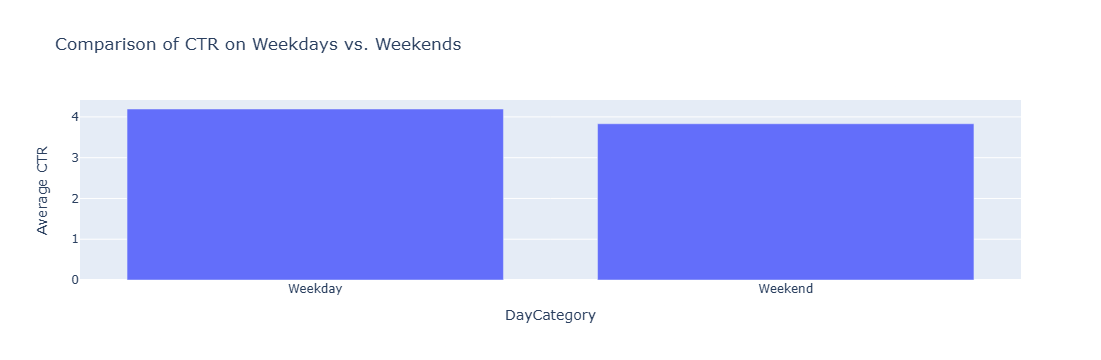

In [26]:
# Create a new column 'DayCategory' to categorize weekdays and weekends
data['DayCategory'] = data['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average CTR for weekdays and weekends
ctr_by_day_category = data.groupby('DayCategory')['CTR'].mean().reset_index()

# Create a bar plot to compare CTR on weekdays vs. weekends
fig = px.bar(ctr_by_day_category, x='DayCategory', y='CTR', title='Comparison of CTR on Weekdays vs. Weekends',
             labels={'CTR': 'Average CTR'})

# Customize the layout
fig.update_layout(yaxis_title='Average CTR')

# Show the plot
fig.show()

**compare the impressions and clicks on weekdays and weekends**

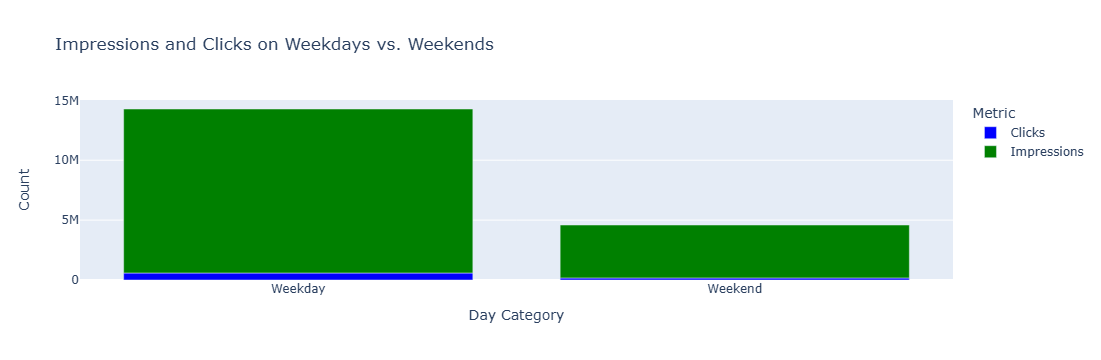

In [27]:
# Group the data by 'DayCategory' and calculate the sum of Clicks and Impressions for each category
grouped_data = data.groupby('DayCategory')[['Clicks', 'Impressions']].sum().reset_index()

# Create a grouped bar chart to visualize Clicks and Impressions on weekdays vs. weekends
fig = px.bar(grouped_data, x='DayCategory', y=['Clicks', 'Impressions'],
             title='Impressions and Clicks on Weekdays vs. Weekends',
             labels={'value': 'Count', 'variable': 'Metric'},
             color_discrete_sequence=['blue', 'green'])

# Customize the layout
fig.update_layout(yaxis_title='Count')
fig.update_xaxes(title_text='Day Category')

# Show the plot
fig.show()

# Ads CTR Forecasting

Let’s see how to forecast the Ads CTR. As CTR is dependent on impressions and impressions change over time, we can use Time Series forecasting techniques to forecast CTR. As CTR is seasonal, let’s calculate the p, d, and q values for the SARIMA model

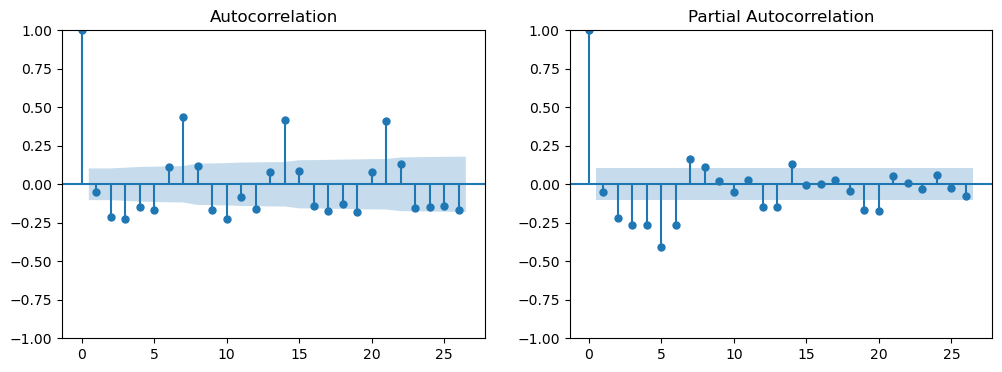

In [28]:
data.reset_index(inplace=True)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# resetting index
time_series = data.set_index('Date')['CTR']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

The value of p, d, and q will be one here. And as we are using the SARIMA model here, the value of s will be 12.

**Let’s train the forecasting model using SARIMA**

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -71.364
Date:                            Fri, 16 May 2025   AIC                            152.728
Time:                                    02:03:47   BIC                            172.046
Sample:                                10-19-2022   HQIC                           160.416
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5265      0.070      7.510      0.000       0.389       0.664
ma.L1         -0.9048      0.036   

# Predict future values

In [30]:
future_steps = 100
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.852369
2023-10-20    3.889455
2023-10-21    3.820307
2023-10-22    3.727494
2023-10-23    3.710336
                ...   
2024-01-22    3.545449
2024-01-23    3.466522
2024-01-24    3.561068
2024-01-25    3.546583
2024-01-26    3.579982
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


**Create a DataFrame with the original data and predictions**

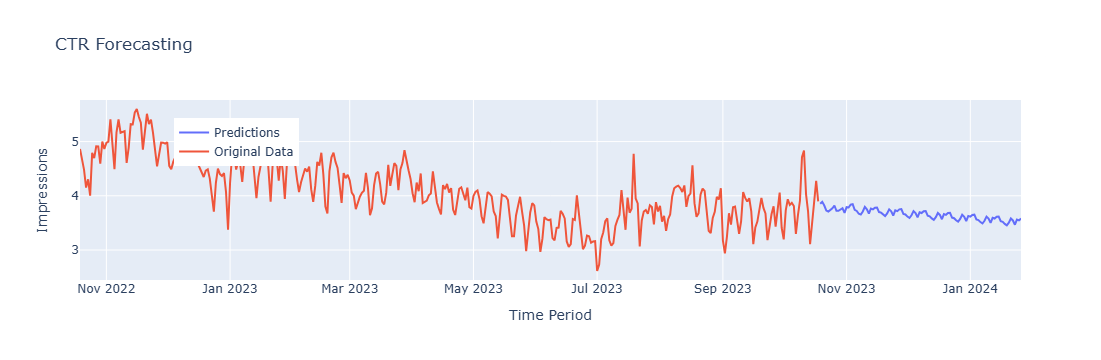

In [31]:

forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Period',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()